Customer Trends Analysis - Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [4]:
# Load cleaned data
df = pd.read_csv(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\processed_data.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}\n")

Dataset loaded successfully!
Shape: (3725, 13)



In [6]:
print("=" * 60)
print("ANALYSIS 1: SALES TRENDS OVER TIME")
print("=" * 60)

ANALYSIS 1: SALES TRENDS OVER TIME


In [7]:
# Daily sales trend
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalAmount'].sum()


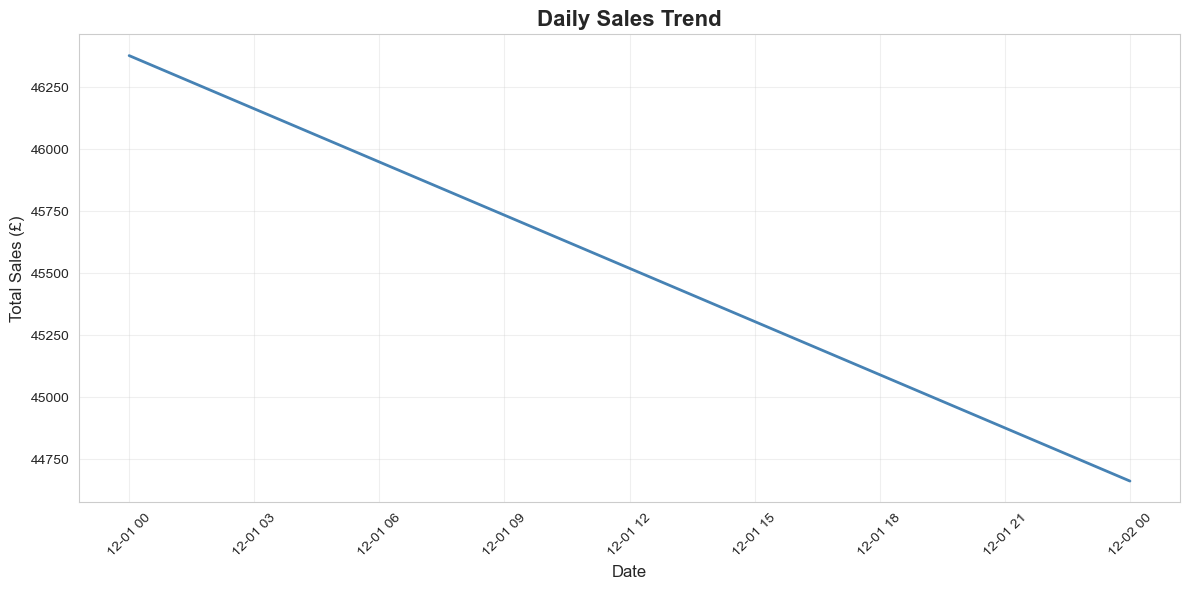

In [9]:
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='steelblue', linewidth=2)
plt.title('Daily Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\daily_sales_trend.png", dpi=100)
plt.show()

In [10]:
print(f"\nTotal Revenue: £{df['TotalAmount'].sum():,.2f}")
print(f"Average Daily Sales: £{daily_sales.mean():,.2f}")
print(f"Best Sales Day: {daily_sales.idxmax()} (£{daily_sales.max():,.2f})")


Total Revenue: £91,039.42
Average Daily Sales: £45,519.71
Best Sales Day: 2010-12-01 (£46,376.49)


In [11]:
print("\n" + "=" * 60)
print("ANALYSIS 2: TOP SELLING PRODUCTS")
print("=" * 60)


ANALYSIS 2: TOP SELLING PRODUCTS


In [12]:
top_products = df.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).sort_values('TotalAmount', ascending=False).head(10)


In [13]:
print("\nTop 10 Products by Revenue:")
print(top_products)



Top 10 Products by Revenue:
                                    Quantity  TotalAmount
Description                                              
REGENCY CAKESTAND 3 TIER                 211      2373.45
RED WOOLLY HOTTIE WHITE HEART.           684      2117.64
BLACK RECORD COVER FRAME                 613      2078.43
WHITE HANGING HEART T-LIGHT HOLDER       748      1945.00
SET 7 BABUSHKA NESTING BOXES             239      1853.00
RED  HARMONICA IN BOX                   1544      1664.00
CHILLI LIGHTS                            328      1322.64
JUMBO BAG RED RETROSPOT                  602      1023.90
ASSORTED COLOUR T-LIGHT HOLDER          1824      1003.20
ASSORTED COLOUR BIRD ORNAMENT            615       962.55


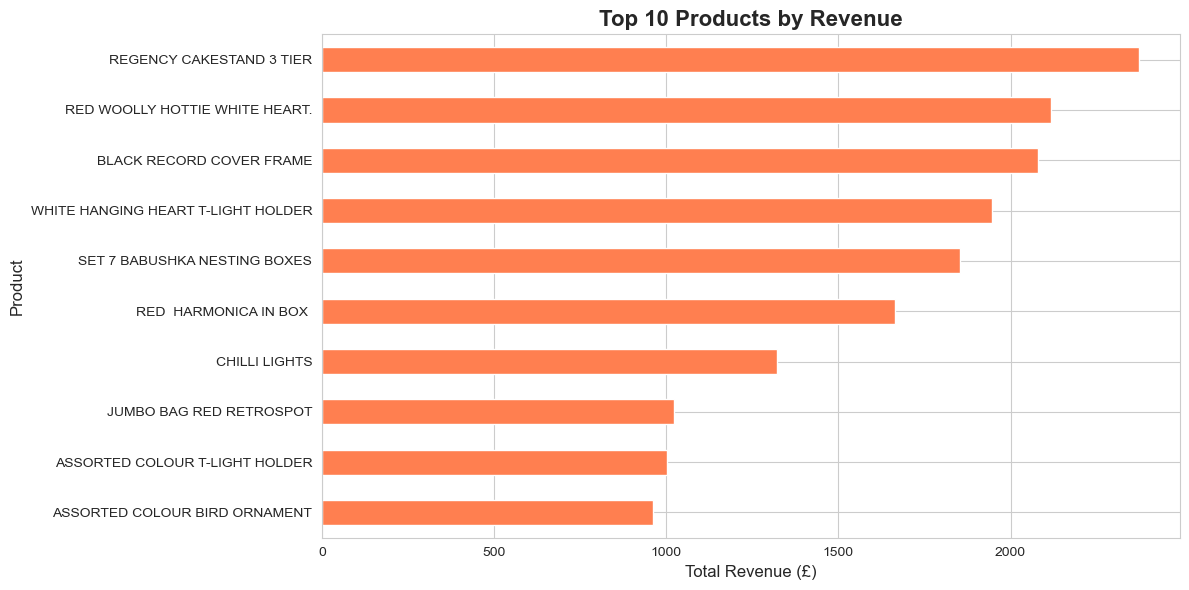

In [15]:
plt.figure(figsize=(12, 6))
top_products['TotalAmount'].plot(kind='barh', color='coral')
plt.title('Top 10 Products by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue (£)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\top_products.png", dpi=100)
plt.show()

In [16]:
print("\n" + "=" * 60)
print("ANALYSIS 3: CUSTOMER BEHAVIOR ANALYSIS")
print("=" * 60)


ANALYSIS 3: CUSTOMER BEHAVIOR ANALYSIS


In [17]:
customer_stats = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of purchases
    'TotalAmount': 'sum',     # Total spent
    'Quantity': 'sum'         # Total items bought
}).rename(columns={
    'InvoiceNo': 'NumPurchases',
    'TotalAmount': 'TotalSpent',
    'Quantity': 'TotalItems'
})

In [18]:
print("\nCustomer Statistics:")
print(f"Total Customers: {len(customer_stats)}")
print(f"Average purchases per customer: {customer_stats['NumPurchases'].mean():.2f}")
print(f"Average spending per customer: £{customer_stats['TotalSpent'].mean():,.2f}")


Customer Statistics:
Total Customers: 179
Average purchases per customer: 1.39
Average spending per customer: £508.60


In [19]:
# Top 10 customers
top_customers = customer_stats.sort_values('TotalSpent', ascending=False).head(10)
print("\nTop 10 Customers by Spending:")
print(top_customers)


Top 10 Customers by Spending:
            NumPurchases  TotalSpent  TotalItems
CustomerID                                      
15061.0                6     9407.34        5475
13777.0                7     6585.16        3348
17850.0               34     5391.21        1733
16029.0                3     4271.52        1936
16210.0                1     2474.74        1070
16754.0                1     2002.40        4280
12433.0                1     1919.14        1852
15299.0                3     1835.01        2097
17511.0                1     1825.74        1568
14031.0                1     1714.25         531


In [20]:
print("\n" + "=" * 60)
print("ANALYSIS 4: PURCHASING PATTERNS BY TIME")
print("=" * 60)


ANALYSIS 4: PURCHASING PATTERNS BY TIME


In [21]:
# Sales by Day of Week
day_sales = df.groupby('DayOfWeek')['TotalAmount'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex([d for d in day_order if d in day_sales.index])


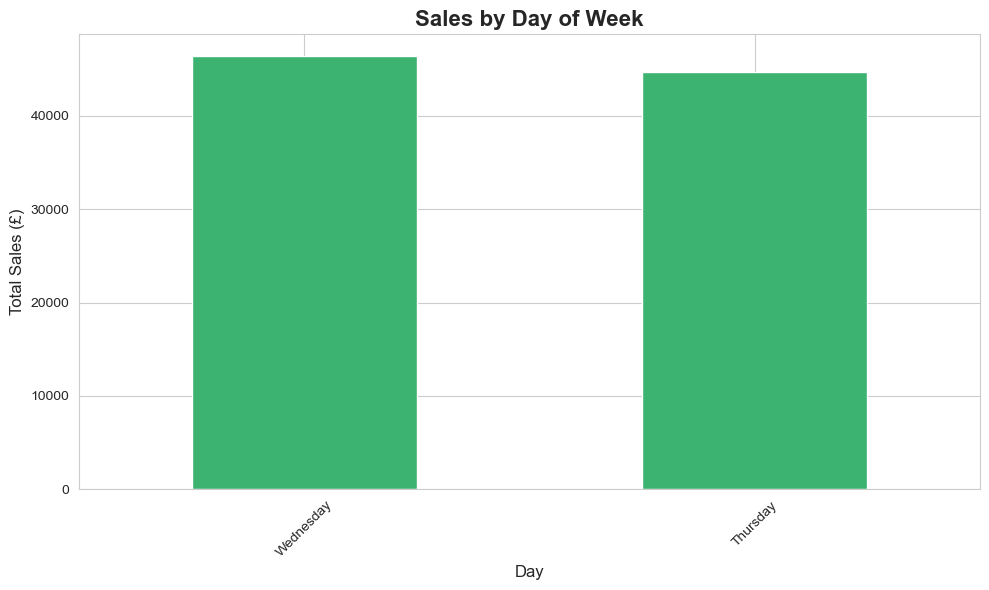

In [23]:
plt.figure(figsize=(10, 6))
day_sales.plot(kind='bar', color='mediumseagreen')
plt.title('Sales by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\sales_by_day.png", dpi=100)
plt.show()

In [24]:
print("\nBest Sales Day:", day_sales.idxmax())
print(f"Sales on best day: £{day_sales.max():,.2f}")


Best Sales Day: Wednesday
Sales on best day: £46,376.49


In [25]:
# Sales by Hour
hour_sales = df.groupby('Hour')['TotalAmount'].sum()

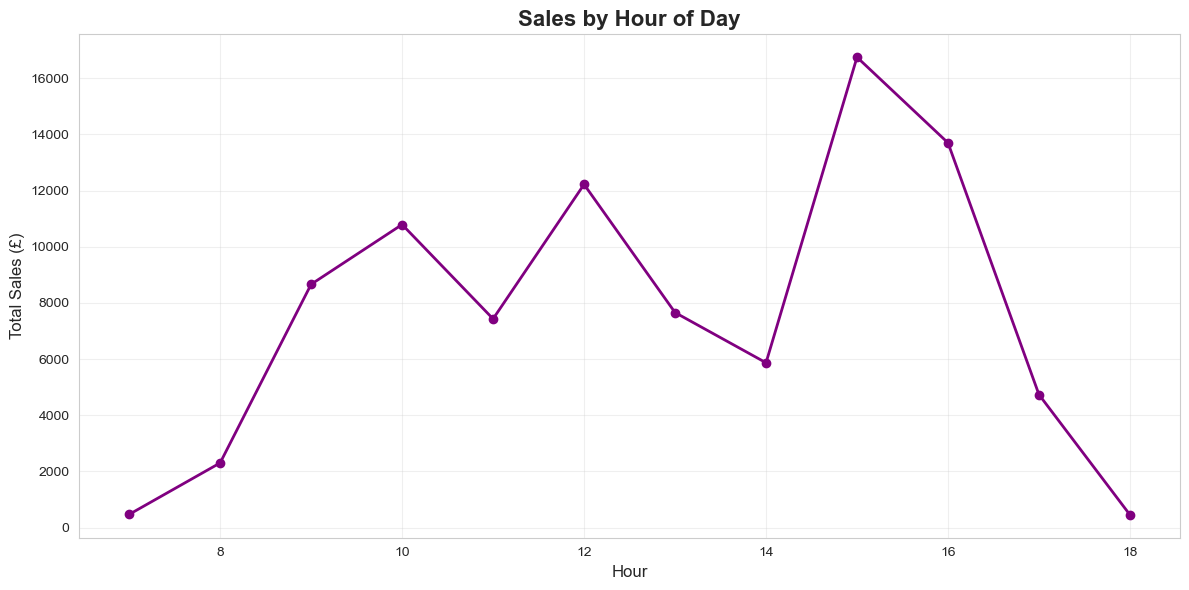

In [26]:
plt.figure(figsize=(12, 6))
hour_sales.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Sales by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\sales_by_hour.png", dpi=100)
plt.show()

In [27]:
print("\nPeak Shopping Hour:", hour_sales.idxmax())


Peak Shopping Hour: 15


In [28]:
print("\n" + "=" * 60)
print("ANALYSIS 5: COUNTRY-WISE ANALYSIS")
print("=" * 60)


ANALYSIS 5: COUNTRY-WISE ANALYSIS


In [32]:
country_sales = df.groupby('Country').agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique'
}).sort_values('TotalAmount', ascending=False).head(10)


In [33]:
print("\nTop 10 Countries by Revenue:")
print(country_sales)


Top 10 Countries by Revenue:
                TotalAmount  CustomerID
Country                                
United Kingdom     86874.21         173
Norway              1919.14           1
France               855.86           1
EIRE                 577.88           1
Australia            358.25           1
Germany              261.48           1
Netherlands          192.60           1


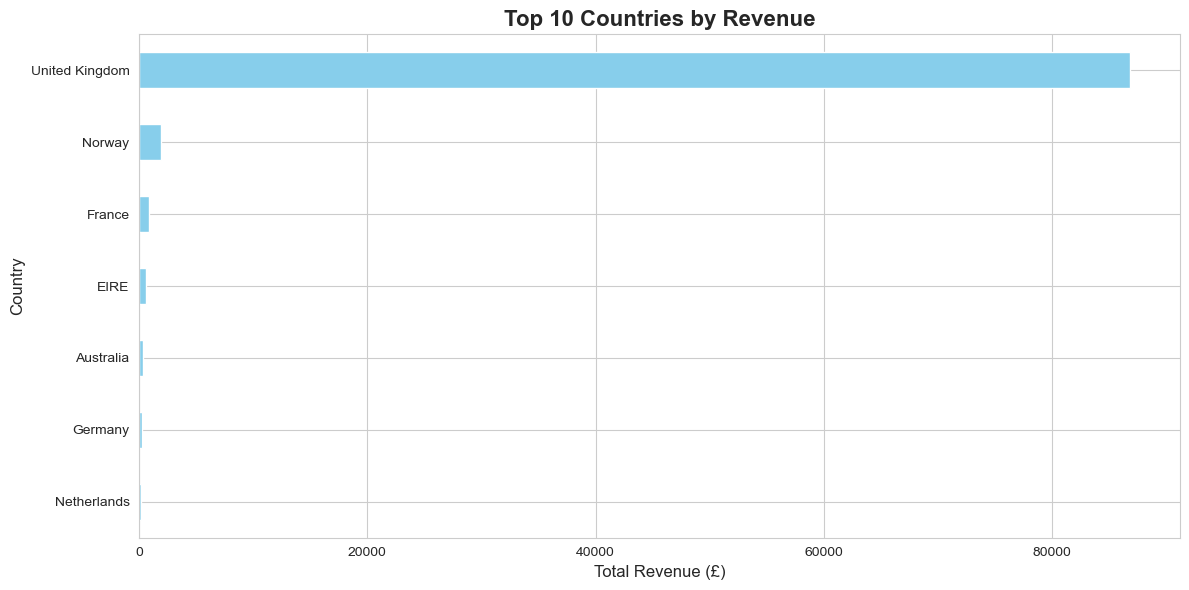

In [34]:
plt.figure(figsize=(12, 6))
country_sales['TotalAmount'].plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue (£)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\sales_by_country.png", dpi=100)
plt.show()

In [35]:
print("\n" + "=" * 60)
print("SAVING SUMMARY STATISTICS")
print("=" * 60)


SAVING SUMMARY STATISTICS


In [37]:
# Create summary dataframe
summary = {
    'Metric': [
        'Total Revenue',
        'Total Orders',
        'Total Customers',
        'Average Order Value',
        'Total Products Sold',
        'Unique Products'
    ],
    'Value': [
        f"£{df['TotalAmount'].sum():,.2f}",
        df['InvoiceNo'].nunique(),
        df['CustomerID'].nunique(),
        f"£{df.groupby('InvoiceNo')['TotalAmount'].sum().mean():,.2f}",
        df['Quantity'].sum(),
        df['Description'].nunique()
    ]
}

In [38]:
summary_df = pd.DataFrame(summary)
summary_df.to_csv(r"C:\Users\aashi\OneDrive\Desktop\customer_trends_analysis\data\processed\summary_statistics.csv", index=False)
print("\n✓ Summary statistics saved!")
print(summary_df)



✓ Summary statistics saved!
                Metric       Value
0        Total Revenue  £91,039.42
1         Total Orders         248
2      Total Customers         179
3  Average Order Value     £367.09
4  Total Products Sold       53449
5      Unique Products        1293


In [39]:
print("\n" + "=" * 60)
print("EXPLORATORY ANALYSIS COMPLETE!")
print("=" * 60)


EXPLORATORY ANALYSIS COMPLETE!
